In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.concat([pd.read_csv('data/%d.csv' % year, 
                                  usecols=['Strokes_from_starting_location','Cat','Distance_from_hole'])
                      for year in range(2003,2018)])

40.0 48.3333333333 24374 3.0 2.81020759826 0.261718737157


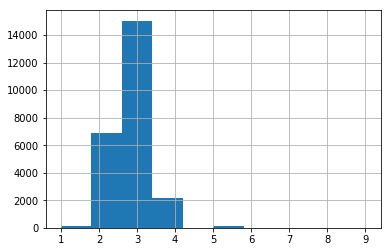

48.3333333333 56.6666666667 16073 3.0 2.86611086916 0.268944621612


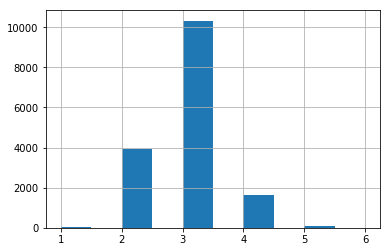

56.6666666667 65.0 11907 3.0 2.91601578903 0.270035670659


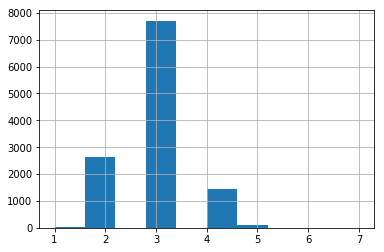

65.0 73.3333333333 10618 3.0 2.92399698625 0.379889296225


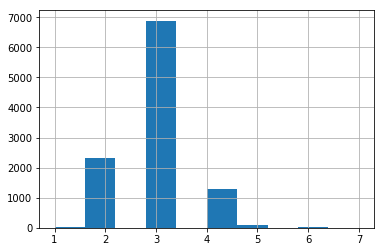

73.3333333333 81.6666666667 10980 3.0 2.95646630237 0.353279399292


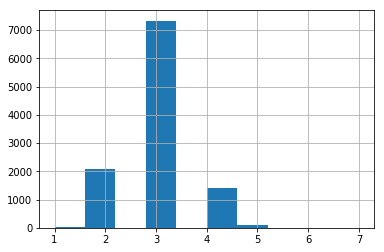

81.6666666667 90.0 12742 3.0 2.97410139695 0.345200622255


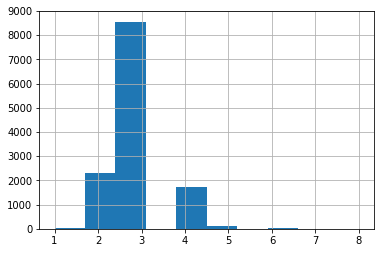

90.0 98.3333333333 15759 3.0 2.99631956342 0.38038927801


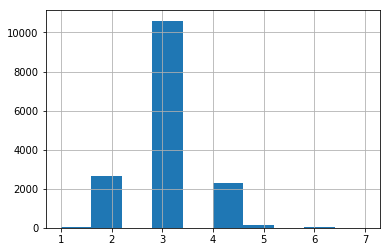

98.3333333333 106.666666667 19563 3.0 3.02468946481 0.416044650717


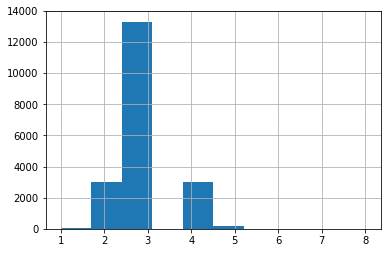

106.666666667 115.0 24125 3.0 3.0574507772 0.400812683913


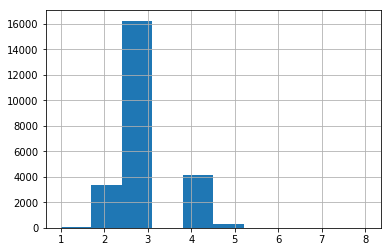

115.0 123.333333333 29260 3.0 3.097949419 0.404876844306


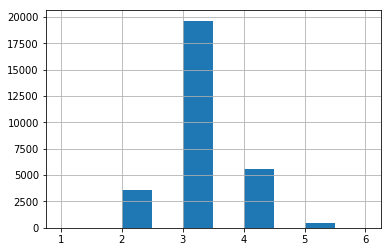

123.333333333 131.666666667 35315 3.0 3.12731134079 0.466689884323


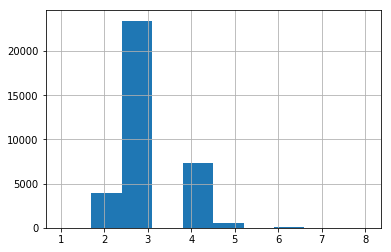

131.666666667 140.0 41597 3.0 3.15188595331 0.488755642401


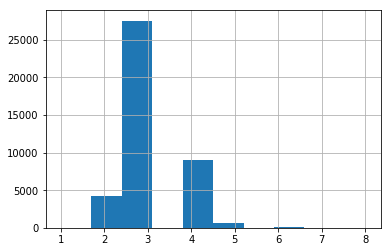

140.0 148.333333333 46253 3.0 3.18022614749 0.518951594921


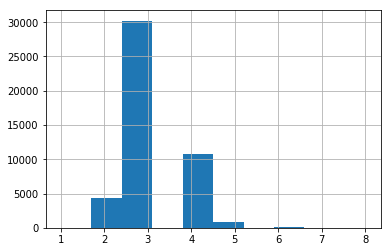

148.333333333 156.666666667 49021 3.0 3.2144999082 0.488564689274


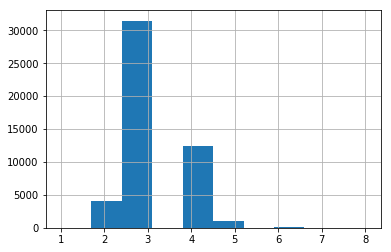

156.666666667 165.0 49957 3.0 3.24977480633 0.499364512145


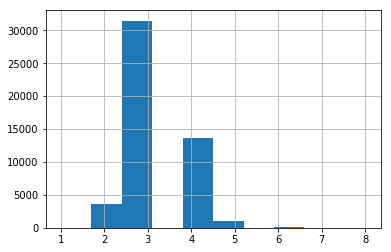

165.0 173.333333333 48568 3.0 3.28897628068 0.519014583506


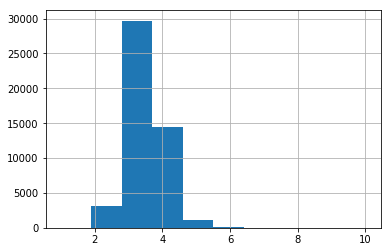

173.333333333 181.666666667 45021 3.0 3.3277581573 0.47697765446


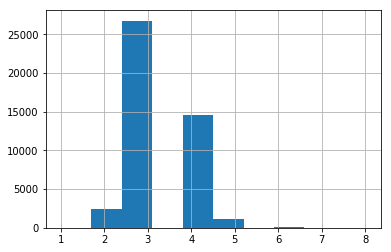

181.666666667 190.0 40780 3.0 3.37103972536 0.489669352885


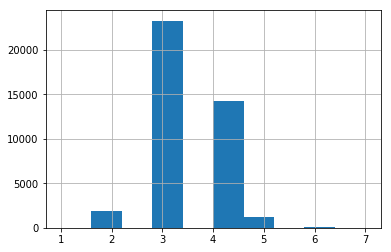

190.0 198.333333333 34738 3.0 3.41533767056 0.430003691839


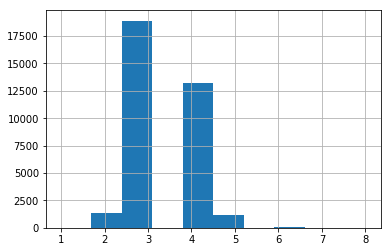

198.333333333 206.666666667 28693 3.0 3.46980099676 0.450149776372


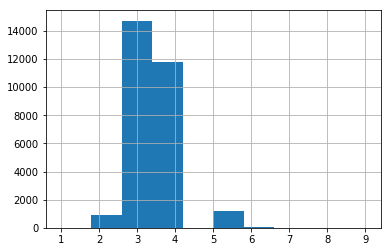

206.666666667 215.0 23912 3.0 3.52429742389 0.42617725232


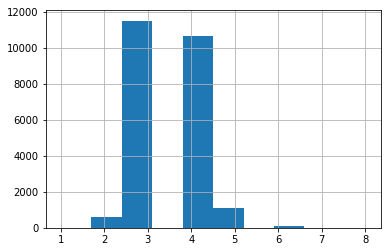

215.0 223.333333333 19437 4.0 3.57596336883 0.433178493706


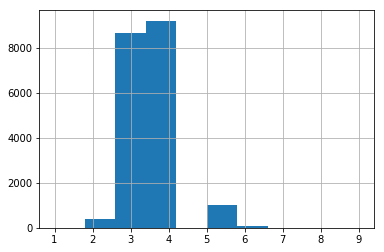

223.333333333 231.666666667 16404 4.0 3.63271153377 0.461624821076


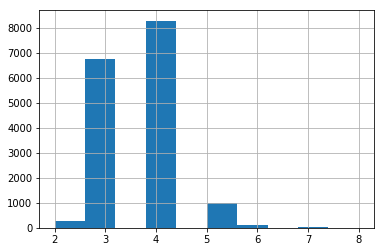

231.666666667 240.0 15031 4.0 3.68046038188 0.386750442708


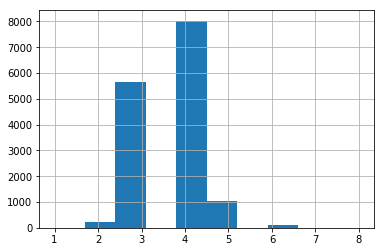

240.0 248.333333333 14830 4.0 3.71652056642 0.379871032448


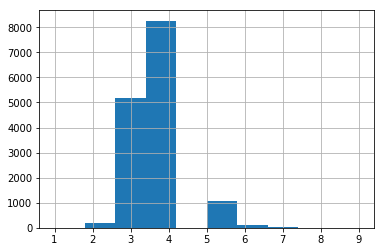

248.333333333 256.666666667 14710 4.0 3.74955812373 0.272380807146


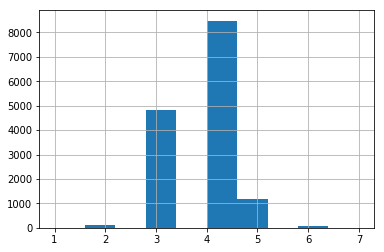

256.666666667 265.0 14674 4.0 3.78431238926 0.424156774927


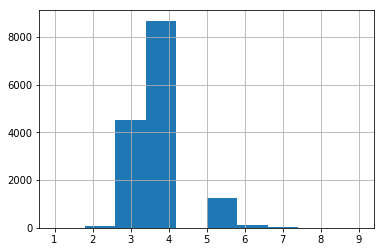

265.0 273.333333333 14238 4.0 3.81528304537 0.396522101879


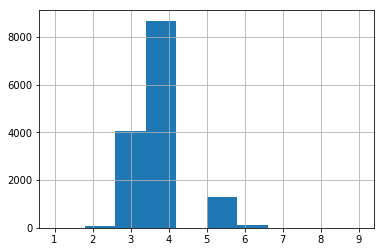

273.333333333 281.666666667 13226 4.0 3.84114622713 0.427335138325


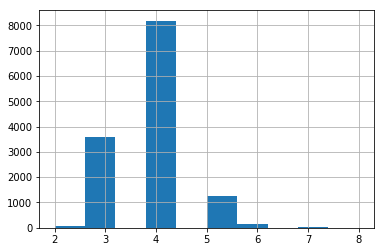

281.666666667 290.0 12292 4.0 3.87129840547 0.379147471129


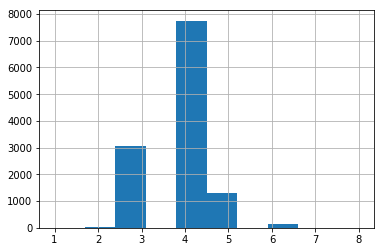

290.0 298.333333333 11117 4.0 3.90501034452 0.371169590401


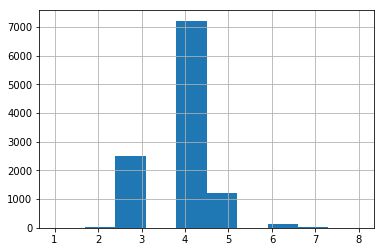

298.333333333 306.666666667 9687 4.0 3.92546712088 0.441760450896


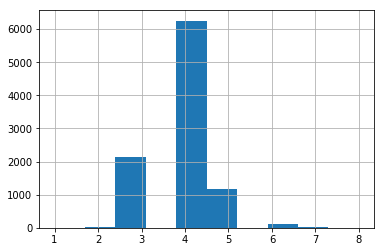

306.666666667 315.0 8101 4.0 3.97938526108 0.457701151508


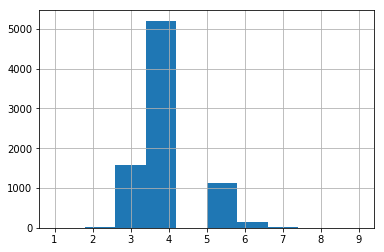

315.0 323.333333333 6598 4.0 4.00682024856 0.641359518732


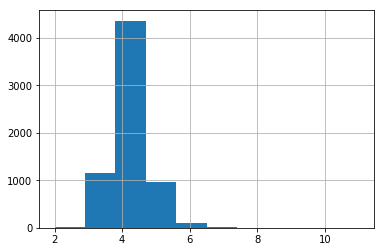

323.333333333 331.666666667 5011 4.0 4.01337058471 0.587183453131


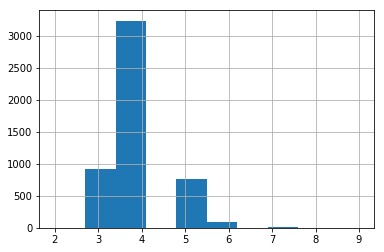

331.666666667 340.0 3631 4.0 4.0581107133 0.513404711188


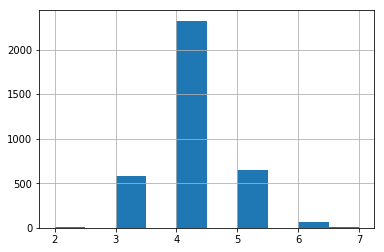

In [12]:
for border in range(120,1000,25):
    mask = (data.Cat=='Primary Rough') & (data.Distance_from_hole>border) & (data.Distance_from_hole<border+25)
    s = data.loc[mask,'Strokes_from_starting_location']
    print border/3.0,(border+25)/3.0,len(s),s.median(),s.mean(),s.skew()
    s.hist();
    plt.show()

In [21]:
standardized_median = np.array([])
for border in range(120,1050,7):
    mask = (data.Cat=='Primary Rough') & (data.Distance_from_hole>border) & (data.Distance_from_hole<border+7)
    s = data.loc[mask,'Strokes_from_starting_location']
    standardized_median = np.concatenate([standardized_median,s-s.median()])

In [19]:
from scipy.stats import skew, skewtest

In [18]:
skew(standardized)

0.4408059514815192

In [20]:
skewtest(standardized)

SkewtestResult(statistic=154.14466415445818, pvalue=0.0)

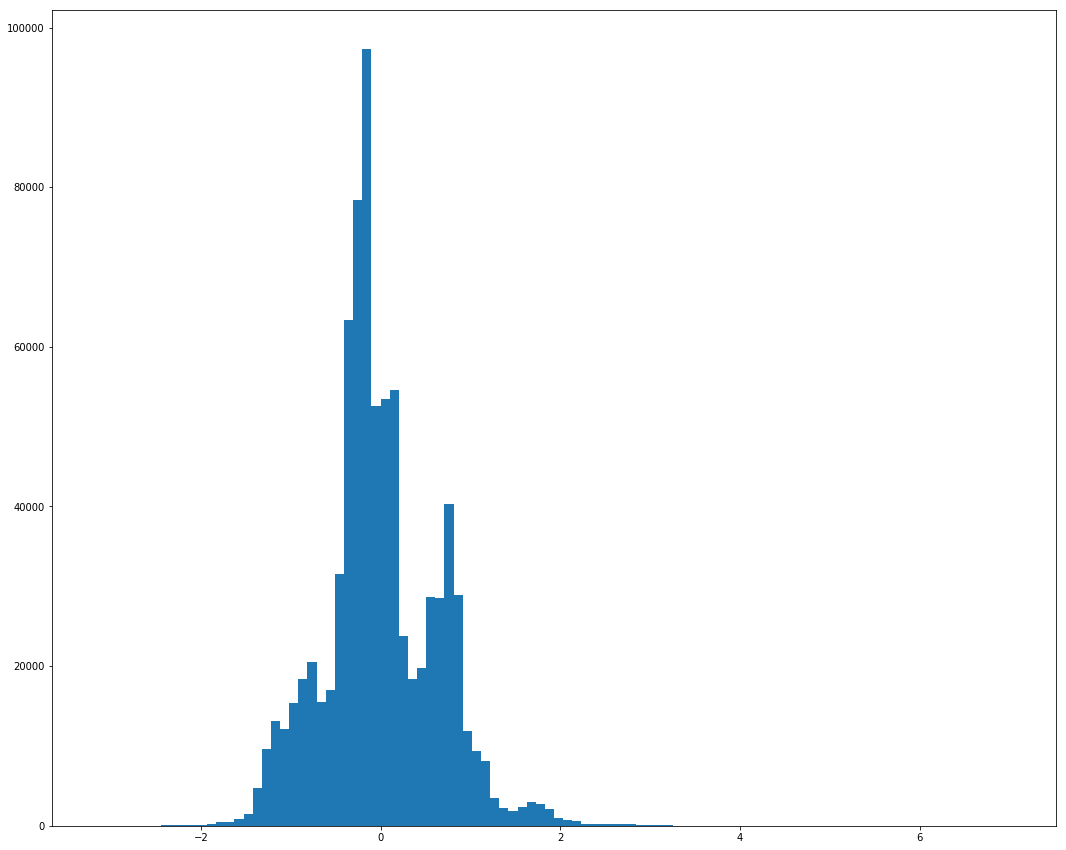

In [16]:
fig,ax = plt.subplots(1,1,figsize=(18,15))
plt.hist(standardized,bins=100);

a is 0.01 5 8 0.5 (lambda 5)



b is 0.01 10 8 0.5 (lambda 10)

In [29]:
a = np.array([0.460455232498 , 0.46066901705 , 0.460604317002 , 0.46052630656 , 0.459333837179 , 0.461788519514 , 0.463929572937 , 0.461994361219 , 0.462966745731 , 0.461789071179 , 0.462865440253 , 0.459996698801 , 0.461368407211 , 0.46395130647 , 0.461461305742])
b = np.array([0.463887490402 , 0.464364800272 , 0.465769704543 , 0.463548892115 , 0.461585415756 , 0.459707354689 , 0.459722444834 , 0.46147466676 , 0.460592161144 , 0.46399332529 , 0.459964783312 , 0.461838998126 , 0.459928350008 , 0.459016294146 , 0.460291116183])

In [30]:
(a.mean() - a.std()/15**.5,a.mean() + a.std()/15**.5),\
(b.mean() - b.std()/15**.5,b.mean() + b.std()/15**.5)

((0.46123523198267646, 0.46192478659679026),
 (0.46118892344481438, 0.46223584956585223))

a is 0.01 5 8 0.3 (lambda 5)



b is 0.01 10 8 0.3 (lambda 5)

In [31]:
a = np.array([0.450339302669 , 0.451134491353 , 0.451802792233 , 0.451728974909 , 0.450338489747 , 0.450236718083 , 0.450516231029 , 0.450051683742 , 0.445722230388 , 0.444604386545 , 0.446774546414 , 0.453124655308 , 0.448134574321 , 0.450853628897 , 0.448519807943])
b = np.array([0.450270314268 , 0.448859696759 , 0.450799036614 , 0.452783052506 , 0.449126944023 , 0.44865524427 , 0.451487447925 , 0.44978031336 , 0.445957123764 , 0.450756881116 , 0.451070248725 , 0.449433346415 , 0.449196654105 , 0.449895455443 , 0.446914651257])

In [32]:
(a.mean() - a.std()/15**.5,a.mean() + a.std()/15**.5),\
(b.mean() - b.std()/15**.5,b.mean() + b.std()/15**.5)

((0.44899750643259595, 0.45018682871153726),
 (0.44923643182832423, 0.45009508957834249))

a is 0.01 5 8 0.5 (eta is .01)

b is 0.005 5 8 0.5 (eta is .005)

In [33]:
a = np.array([0.460455232498 , 0.46066901705 , 0.460604317002 , 0.46052630656 , 0.459333837179 , 0.461788519514 , 0.463929572937 , 0.461994361219 , 0.462966745731 , 0.461789071179 , 0.462865440253 , 0.459996698801 , 0.461368407211 , 0.46395130647 , 0.461461305742])
b = np.array([0.461728189136 , 0.460756223106 , 0.461842749396 , 0.458905068266 , 0.462515005497 , 0.46128015346 , 0.465055403923 , 0.461989129978 , 0.459235599072 , 0.462518421327 , 0.461124010408 , 0.459429910672 , 0.461369717358 , 0.461413433457 , 0.462569766916])

In [34]:
(a.mean() - a.std()/15**.5,a.mean() + a.std()/15**.5),\
(b.mean() - b.std()/15**.5,b.mean() + b.std()/15**.5)

((0.46123523198267646, 0.46192478659679026),
 (0.46106509239971499, 0.46183261186321839))

a is 0.01 5 8 0.3 (eta is .01)

b is 0.005 5 8 0.3 (eta is .005)

In [35]:
a = np.array([0.450339302669 , 0.451134491353 , 0.451802792233 , 0.451728974909 , 0.450338489747 , 0.450236718083 , 0.450516231029 , 0.450051683742 , 0.445722230388 , 0.444604386545 , 0.446774546414 , 0.453124655308 , 0.448134574321 , 0.450853628897 , 0.448519807943])
b = np.array([0.451197021788 , 0.44820617317 , 0.449021068156 , 0.449718572146 , 0.449617017626 , 0.453613403624 , 0.453685047756 , 0.45003575355 , 0.44990813799 , 0.449300227305 , 0.447911699134 , 0.449714216857 , 0.450826012277 , 0.448473510132 , 0.452760072253])

In [36]:
(a.mean() - a.std()/15**.5,a.mean() + a.std()/15**.5),\
(b.mean() - b.std()/15**.5,b.mean() + b.std()/15**.5)

((0.44899750643259595, 0.45018682871153726),
 (0.44980889923304174, 0.45072282526882484))